In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import quandl

%matplotlib inline

In [15]:
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date', parse_dates=True)
google = pd.read_csv('GOOG_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date', parse_dates=True)

In [16]:
print(ibm.head())
print(ibm.tail())

Adj. Close
Date                  
2012-01-03  160.830881
2012-01-04  160.174781
2012-01-05  159.415086
2012-01-06  157.584912
2012-01-09  156.764786
            Adj. Close
Date                  
2016-12-23  163.790152
2016-12-27  164.212620
2016-12-28  163.279259
2016-12-29  163.682078
2016-12-30  163.082762


In [17]:
ibm.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [19]:
# Concateneate them into a single dataframe

stocks = pd.concat([aapl,amzn,cisco,ibm], axis=1)
stocks.head()


Adj. Close  Adj. Close  Adj. Close  Adj. Close
Date                                                      
2012-01-03   53.063218      179.03   15.752778  160.830881
2012-01-04   53.348386      177.51   16.057180  160.174781
2012-01-05   53.940658      177.61   15.997991  159.415086
2012-01-06   54.504543      182.61   15.938801  157.584912
2012-01-09   54.418089      178.56   16.040268  156.764786

In [20]:
stocks.columns = ['aapl','amzn','cisco','ibm']

In [21]:
stocks.head()

aapl    amzn      cisco         ibm
Date                                                
2012-01-03  53.063218  179.03  15.752778  160.830881
2012-01-04  53.348386  177.51  16.057180  160.174781
2012-01-05  53.940658  177.61  15.997991  159.415086
2012-01-06  54.504543  182.61  15.938801  157.584912
2012-01-09  54.418089  178.56  16.040268  156.764786

In [22]:
# Average daily %age change
stocks.pct_change(1).mean()

aapl     0.000750
amzn     0.001328
cisco    0.000599
ibm      0.000081
dtype: float64

In [23]:
# Pearson correlation
stocks.pct_change(1).corr()

aapl      amzn     cisco       ibm
aapl   1.000000  0.235487  0.301990  0.297498
amzn   0.235487  1.000000  0.284470  0.258492
cisco  0.301990  0.284470  1.000000  0.424672
ibm    0.297498  0.258492  0.424672  1.000000

In [24]:
# Difference between arithmetic returns and log returns
# Log returns are more useful as they de-trend normalise data

# Arithmetic returns
stocks.pct_change(1).head()

aapl      amzn     cisco       ibm
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.005374 -0.008490  0.019324 -0.004079
2012-01-05  0.011102  0.000563 -0.003686 -0.004743
2012-01-06  0.010454  0.028152 -0.003700 -0.011481
2012-01-09 -0.001586 -0.022178  0.006366 -0.005204

In [29]:
# Log returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

aapl      amzn     cisco       ibm
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.005360 -0.008526  0.019139 -0.004088
2012-01-05  0.011041  0.000563 -0.003693 -0.004754
2012-01-06  0.010400  0.027763 -0.003707 -0.011547
2012-01-09 -0.001587 -0.022428  0.006346 -0.005218

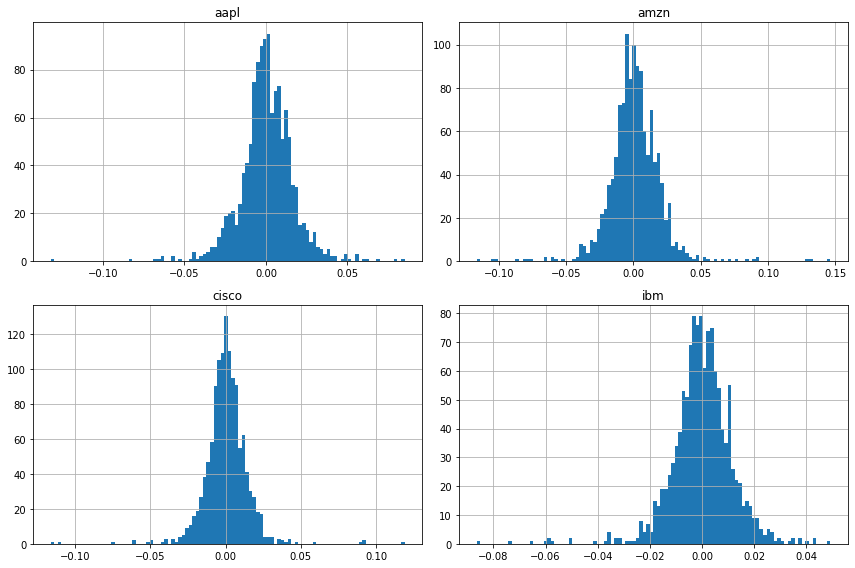

In [31]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [32]:
log_ret.mean()

aapl     0.000614
amzn     0.001139
cisco    0.000497
ibm      0.000011
dtype: float64

In [34]:
# pairwise co-variance
log_ret.cov() * 252 # number of business days

aapl      amzn     cisco       ibm
aapl   0.068326  0.018986  0.017854  0.014464
amzn   0.018986  0.094470  0.019956  0.014939
cisco  0.017854  0.019956  0.051381  0.018029
ibm    0.014464  0.014939  0.018029  0.035203

In [72]:
# Random Monte Carlo simulation
print(stocks.columns)
np.random.seed(101)
weights = np.array(np.random.random(4))

print(f"Random weights: {weights} Total: {weights.sum()}")
# But the weights don't add upto 1 so we need to normalse

weights = weights / weights.sum()
print(f"Balanced weights: {weights} Total: {weights.sum()}")
print()

# Expected return
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print(f"Expected Portfolio Return: {exp_ret}")

# Expected volatility
exp_volatility = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(f"Expected volatility: {exp_volatility}")

# Sharpe Ratio
sr = exp_ret / exp_volatility 
print(f"Sharpe Ratio: {sr}")

Index(['aapl', 'amzn', 'cisco', 'ibm'], dtype='object')
Random weights: [0.51639863 0.57066759 0.02847423 0.17152166] Total: 1.2870620972737856
Balanced weights: [0.40122278 0.44338777 0.02212343 0.13326603] Total: 1.0000000000000002

Expected Portfolio Return: 0.19257413230950263
Expected volatility: 0.20273990622326798
Sharpe Ratio: 0.9498580516133303


In [76]:

np.random.seed(101)
num_portfolios = 25000
all_weights = np.zeros((num_portfolios,len(stocks.columns)))
return_array = np.zeros(num_portfolios)
volatility_array = np.zeros(num_portfolios)
sharpe_array = np.zeros(num_portfolios)

for ind in range(num_portfolios):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights / weights.sum()

    # Saved Weights
    all_weights[ind,:] = weights
    
    # Expected return
    return_array[ind] = np.sum((log_ret.mean() * weights) * 252)

    # Expected volatility
    volatility_array[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_array[ind] = return_array[ind] / volatility_array[ind]



In [77]:
sharpe_array.max()

1.029329177889919

In [86]:
# Get the iloc of the max Sharpe Ratio value

max_iloc = sharpe_array.argmax()
#all_weights[max_iloc,:]
max_sharpe_return = return_array[max_iloc]
max_sharpe_volatility = volatility_array[max_iloc]

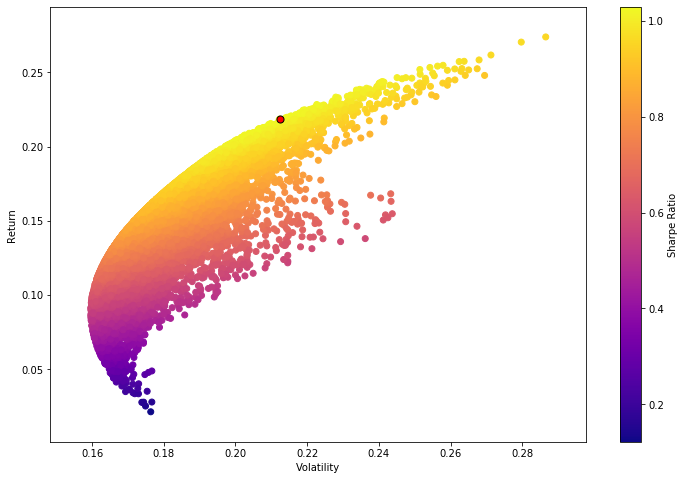

In [88]:
plt.figure(figsize=(12,8))
plt.scatter(x=volatility_array,y=return_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(x=max_sharpe_volatility,y=max_sharpe_return,c='red',s=50,edgecolors='black')

In [ ]:
## Use SciPy to create an optimisation rather than random guesses.


In [134]:
def get_returns_volatility_sharpe_ratio(weights):
    weights = np.array(weights)
    returns = np.sum(log_ret.mean() * weights * 252)
    volatility = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sharpe_ratio = returns / volatility
    return np.array([returns,volatility,sharpe_ratio])
    

In [91]:
from scipy.optimize import minimize

In [135]:
# Create some helper functions for the optimizer

def negative_sharpe(weights):
    return get_returns_volatility_sharpe_ratio(weights)[0] * -1

def check_sum(weights):
    # Returns the distance that the weights are away from 0
    return np.sum(weights) - 1

In [94]:
constraints = ({'type':'eq','fun':check_sum})
bounds = ((0,1),(0,1),(0,1),(0,1))
initial_guess = [0.25,0.25,0.25,0.25]

In [136]:
# SLSQP is a scipi method - Sequential Least SQuares Prgoramming
optimised_results = minimize(negative_sharpe, initial_guess, method='SLSQP',bounds=bounds,constraints=constraints )
optimised_results

     fun: -0.28715299133585226
     jac: array([-0.15480341, -0.28715299, -0.12529137, -0.00278752])
 message: 'Positive directional derivative for linesearch'
    nfev: 757
     nit: 55
    njev: 51
  status: 8
 success: False
       x: array([1.00091015e-10, 1.00000000e+00, 1.18873839e-17, 1.07518912e-16])

In [137]:
get_returns_volatility_sharpe_ratio(optimised_results.x)[0]


0.28715299133585226

In [138]:
# Create the frontier chart
# y axis
frontier_y = np.linspace(0,0.3,100)

In [144]:
def minimize_volatility(weights):
    return get_returns_volatility_sharpe_ratio(weights)[1]

In [145]:
# Solve the best volatility for each value in frontier_y
frontier_volatility = []

for possible_return in frontier_y:
    # Function for return
    constraints = ({'type':'eq','fun': check_sum},
                   {'type':'eq','fun': lambda weight: get_returns_volatility_sharpe_ratio (weight)[0] - possible_return})
    
    result = minimize(minimize_volatility,initial_guess,method='SLSQP',bounds=bounds,constraints=constraints)
    frontier_volatility.append(result['fun'])


In [146]:
frontier_volatility

[0.18762546694510138,
 0.18744450298619428,
 0.18525289121142266,
 0.18315180688244698,
 0.1811378909601446,
 0.1792140841017781,
 0.1773833245474822,
 0.17564853733240757,
 0.17401258502650618,
 0.17247817861609163,
 0.17104814364952828,
 0.1697251168421721,
 0.16851161733704093,
 0.16741002581752323,
 0.16642256355032053,
 0.165550528734018,
 0.16475098389808562,
 0.16400737980899643,
 0.16331970172493063,
 0.1626887116534545,
 0.16211505383597588,
 0.1615993387985725,
 0.16114212294371943,
 0.1607439054261366,
 0.16040512576597402,
 0.16012616081945014,
 0.1599073240362457,
 0.15974886240261899,
 0.15965095568764498,
 0.15961371532780286,
 0.15963718377810882,
 0.15972133427731125,
 0.15986607100482977,
 0.16007122962178955,
 0.16033657819500444,
 0.16066181848644348,
 0.16104658762280227,
 0.1614904600864321,
 0.16199295002225067,
 0.16255351383930502,
 0.16317155303186218,
 0.16384826061179564,
 0.1645781073809559,
 0.16536386375699919,
 0.1662048177750836,
 0.1671000897788278,
 0

In [143]:
frontier_y

array([0.        , 0.0030303 , 0.00606061, 0.00909091, 0.01212121,
       0.01515152, 0.01818182, 0.02121212, 0.02424242, 0.02727273,
       0.03030303, 0.03333333, 0.03636364, 0.03939394, 0.04242424,
       0.04545455, 0.04848485, 0.05151515, 0.05454545, 0.05757576,
       0.06060606, 0.06363636, 0.06666667, 0.06969697, 0.07272727,
       0.07575758, 0.07878788, 0.08181818, 0.08484848, 0.08787879,
       0.09090909, 0.09393939, 0.0969697 , 0.1       , 0.1030303 ,
       0.10606061, 0.10909091, 0.11212121, 0.11515152, 0.11818182,
       0.12121212, 0.12424242, 0.12727273, 0.13030303, 0.13333333,
       0.13636364, 0.13939394, 0.14242424, 0.14545455, 0.14848485,
       0.15151515, 0.15454545, 0.15757576, 0.16060606, 0.16363636,
       0.16666667, 0.16969697, 0.17272727, 0.17575758, 0.17878788,
       0.18181818, 0.18484848, 0.18787879, 0.19090909, 0.19393939,
       0.1969697 , 0.2       , 0.2030303 , 0.20606061, 0.20909091,
       0.21212121, 0.21515152, 0.21818182, 0.22121212, 0.22424

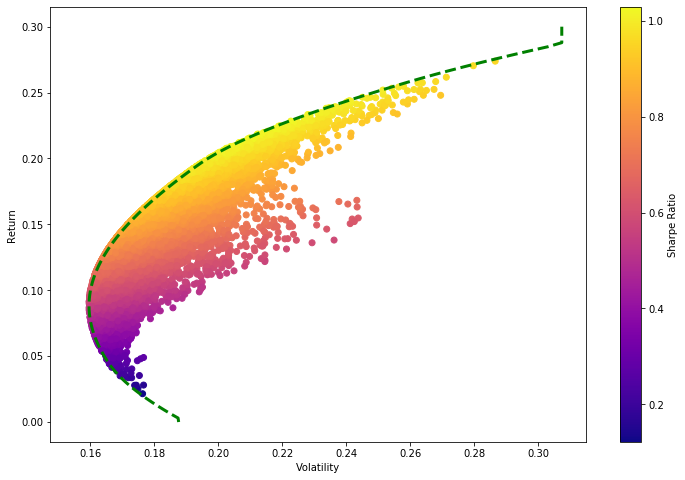

In [147]:
plt.figure(figsize=(12,8))
plt.scatter(x=volatility_array,y=return_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)